## INFO

Ideas on neural net building...

- https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464
- https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
- https://playground.tensorflow.org/#activation=tanh&batchSize=20&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=15&networkShape=4,4,4,2&seed=0.19707&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false
- https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319
- https://hackernoon.com/building-a-feedforward-neural-network-from-scratch-in-python-d3526457156b
- https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [1]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)

In [2]:
import sys
print("Python version should be 3.7.9.")
print("Current Python Version: {}".format(sys.version))

Python version should be 3.7.9.
Current Python Version: 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]


### data

In [3]:
from sklearn.datasets import load_breast_cancer, make_circles

In [4]:
bc = load_breast_cancer(return_X_y=False, as_frame=True)

In [5]:
bc['data'].head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [6]:
bc.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [7]:
xc, yc = make_circles(n_samples=500, shuffle=True, factor=0.5, random_state=123, noise=0.15)

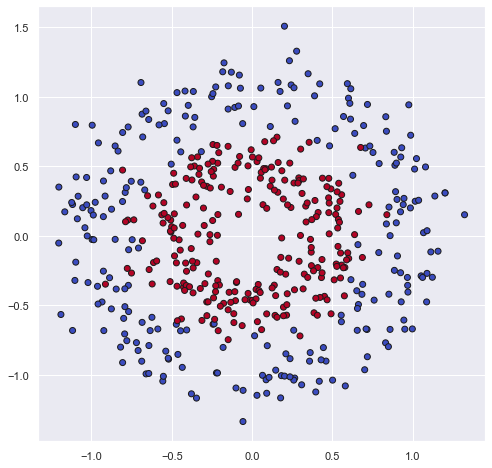

In [8]:
fig, ax=plt.subplots(1,1,figsize=(8,8))
ax.scatter(xc[:,0], xc[:,1], c=yc, edgecolor='k', **{'cmap':'coolwarm'});

## Single Layer Perceptron

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
import tensorflow as tf

# from tensorflow.keras import 

import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
tf.__version__

'1.14.0'

In [12]:
tf.compat.v1.placeholder(shape=[None, 2], dtype=tf.float32)

AttributeError: module 'tensorflow._api.v1.compat.v1.compat' has no attribute 'v1'

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(xc,yc,test_size=0.3,random_state=123)
print(xtrain.shape,ytrain.shape)

(350, 2) (350,)


In [14]:
train = tf.data.Dataset.from_tensor_slices((xtrain,ytrain))

In [28]:
from typing import Tuple
import numpy as np

class BatchMaker(object):
    def __init__(self, feat: np.array, lab: np.array) -> None:
        if len(feat) != len(lab):
            raise ValueError("Expected feat and lab to have the same number of samples")
        self.feat = feat
        self.lab = lab
        self.indexes = np.arange(len(feat))
        np.random.shuffle(self.indexes)
        self.pos = 0

    # "BatchMaker, BatchMaker, make me a batch..."
    def next_batch(self, batch_size: int) -> Tuple[np.array, np.array]:
        if self.pos + batch_size > len(self.feat):
            np.random.shuffle(self.indexes)
            self.pos = 0
        batch_indexes = self.indexes[self.pos: self.pos + batch_size]
        self.pos += batch_size
        return self.feat[batch_indexes], self.lab[batch_indexes]
    
    
## ==========================================================================================    
class Dataset:
    def __init__(self,data):
        self._index_in_epoch = 0
        self._epochs_completed = 0
        self._data = data
        self._num_examples = data.shape[0]
        pass


    @property
    def data(self):
        return self._data

    def next_batch(self,batch_size,shuffle = True):
        start = self._index_in_epoch
        if start == 0 and self._epochs_completed == 0:
            idx = np.arange(0, self._num_examples)  # get all possible indexes
            np.random.shuffle(idx)  # shuffle indexe
            self._data = self.data[idx]  # get list of `num` random samples

        # go to the next batch
        if start + batch_size > self._num_examples:
            self._epochs_completed += 1
            rest_num_examples = self._num_examples - start
            data_rest_part = self.data[start:self._num_examples]
            idx0 = np.arange(0, self._num_examples)  # get all possible indexes
            np.random.shuffle(idx0)  # shuffle indexes
            self._data = self.data[idx0]  # get list of `num` random samples

            start = 0
            self._index_in_epoch = batch_size - rest_num_examples #avoid the case where the #sample != integar times of batch_size
            end =  self._index_in_epoch  
            data_new_part =  self._data[start:end]  
            return np.concatenate((data_rest_part, data_new_part), axis=0)
        else:
            self._index_in_epoch += batch_size
            end = self._index_in_epoch
            return self._data[start:end]

In [29]:
train2 = BatchMaker(xtrain, ytrain)

In [36]:
train3 = Dataset(np.hstack([xtrain,ytrain.reshape(-1,1)]))

- https://stackoverflow.com/questions/40994583/how-to-implement-tensorflows-next-batch-for-own-data

In [37]:
# Parameters 
learning_rate = 0.01 
training_epochs = 25 
batch_size = 100 
display_step = 1 

# tf Graph Input 
# x = xc.astype(float) #
x = tf.placeholder("float", [None, 1000]) #784]) # mnist data image of shape 28*28 = 784 
# y = yc.astype(float) #t
y = tf.placeholder("float", [None, 2]) #10]) # 0-9 digits recognition => 10 classes 

# Create model 
# Set model weights 
W = tf.Variable(tf.zeros([xc.shape[0] * xc.shape[1], 2])) #10])) 
b = tf.Variable(tf.zeros([2])) #10])) 

# Construct model 
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax 

# Minimize error using cross entropy 
cross_entropy = y*tf.log(activation) 
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy,reduction_indices = 1)) 

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

#Plot settings 
avg_set = [] 
epoch_set = [] 

# Initializing the variables 
init = tf.initialize_all_variables()
# Launch the graph 
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
#         total_batch = int(mnist.train.num_examples/batch_size)
        total_batch = int(len(xtrain)/batch_size)
        print(total_batch)

        # Loop over all batches
        for i in range(total_batch):
#             batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#             batch_xs, batch_ys = next_batch(batch_size, xtrain, ytrain) ## nope
            batch_xs, batch_ys = train3.next_batch(batch_size)
            
    
            # Fit training using batch data 
            sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys}) 
            # Compute average loss 
            avg_cost += sess.run(cost, feed_dict = {x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            avg_set.append(avg_cost) 
            epoch_set.append(epoch+1)
    print ("Training phase finished")

    plt.plot(epoch_set,avg_set, 'o', label = 'Logistic Regression Training phase') 
    plt.ylabel('cost') 
    plt.xlabel('epoch') 
    plt.legend() 
    plt.show() 

    # Test model 
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1)) 

    # Calculate accuracy 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) 
    print("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

3


ValueError: too many values to unpack (expected 2)